In [339]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec

In [340]:
df = pd.read_csv("Lab 2 - Sheet1.csv")
xArray = df["position (mm)1"].values
yArray = df["voltage (mV)1"].values

xArray1 = df["position (mm)2"].values
yArray1= df["voltage (mV)2"].values

xArray2 = df["position (mm)3"].values
yArray2 = df["counts3"].values

xArray3 = df["position (mm)4"].values
yArray3= df["counts4"].values


Text(0.5, 1.0, 'Laser - Double Slit')

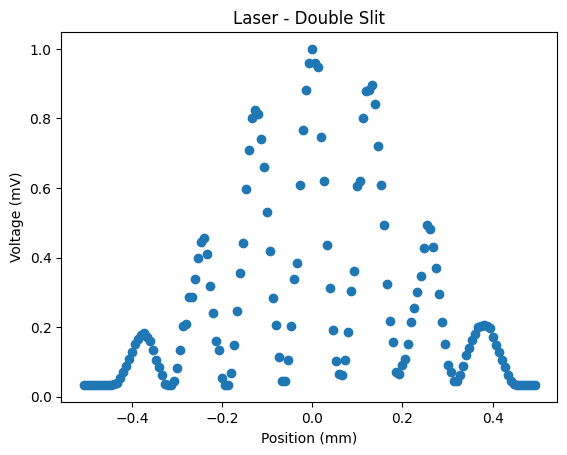

In [341]:
x_max= max(xArray)
y_max = max(yArray)
x_min = min(xArray)
y_min = min(yArray)

xArray_Norm = (xArray/x_max)-0.5066666666666666
yArray_Norm = yArray/y_max


plt.scatter(xArray_Norm, yArray_Norm)
plt.xlabel('Position (mm)')
plt.ylabel('Voltage (mV)')
plt.title('Laser - Double Slit')


Text(0.5, 1.0, 'Laser - Double Slit')

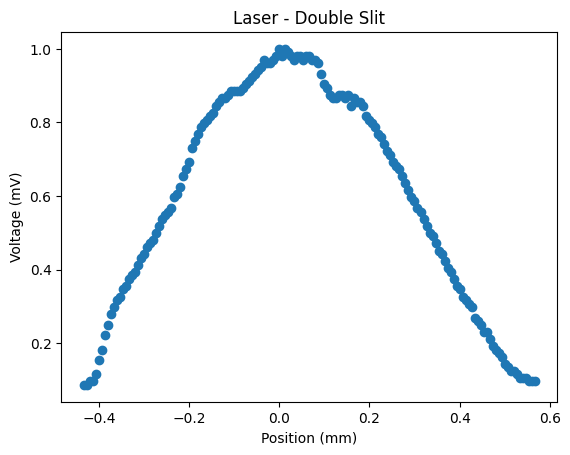

In [342]:
x_max1= max(xArray1)
y_max1 = max(yArray1)
x_min1 = min(xArray1)
y_min1 = min(yArray1)



xArray_Norm1 = ((xArray1/x_max1) -0.43333333333333335)
yArray_Norm1 = yArray1/y_max1


plt.scatter(xArray_Norm1, yArray_Norm1)
plt.xlabel('Position (mm)')
plt.ylabel('Voltage (mV)')
plt.title('Laser - Double Slit')

Text(0.5, 1.0, 'Bulb - Double Slit')

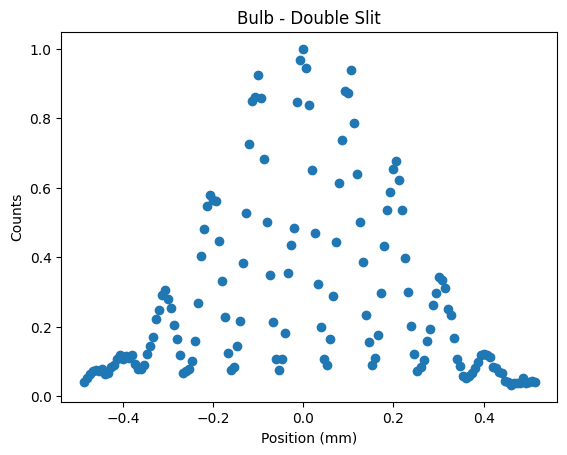

In [343]:
x_max2= max(xArray2)
y_max2 = max(yArray2)
x_min2 = min(xArray2)
y_min2 = min(yArray2)

xArray_Norm2 = (xArray2/x_max2) -0.48666666666666664
yArray_Norm2 = yArray2/y_max2



plt.scatter(xArray_Norm2 , yArray_Norm2)
plt.xlabel('Position (mm)')
plt.ylabel('Counts')
plt.title('Bulb - Double Slit')

Text(0.5, 1.0, 'Bulb - Single Slit')

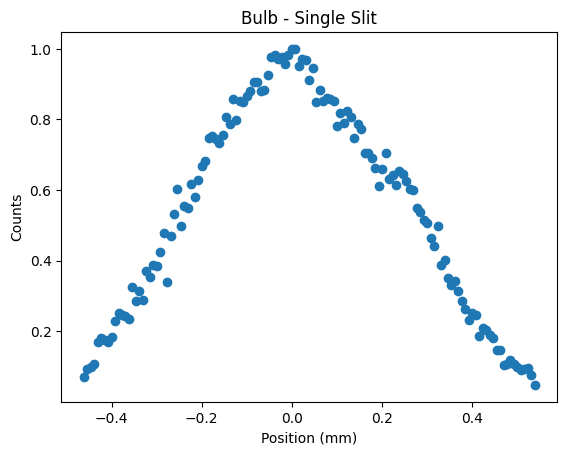

In [344]:
x_max3= max(xArray3)
y_max3 = max(yArray3)
x_min3 = min(xArray3)
y_min3 = min(yArray3)

xArray_Norm3 = (xArray3/x_max3) - 0.46153846153846156
xArray_Norm3= xArray_Norm3[:-20] #This gets rid of the last 20 elements of the array
yArray_Norm3 = yArray3/y_max3
yArray_Norm3= yArray_Norm3[:-20] #This gets rid of the last 20 elements of the array


plt.scatter(xArray_Norm3, yArray_Norm3)
plt.xlabel('Position (mm)')
plt.ylabel('Counts')
plt.title('Bulb - Single Slit')

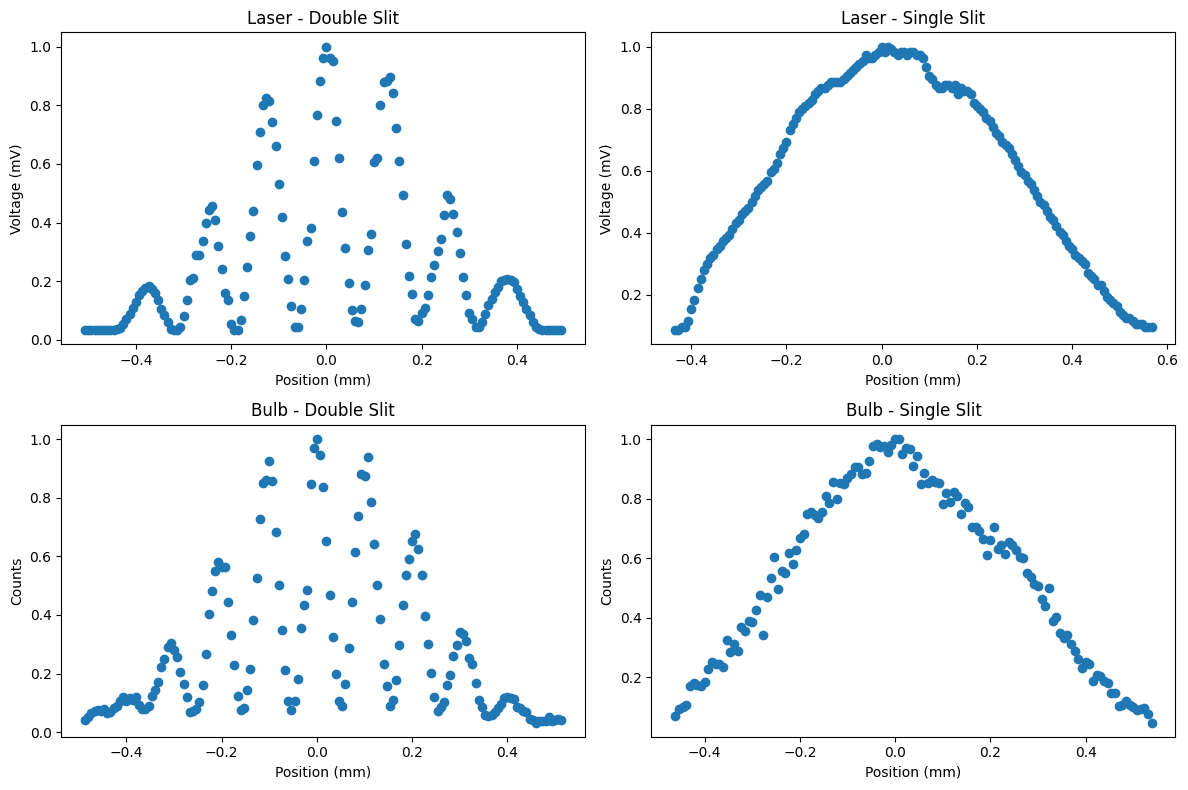

In [345]:
plt.figure(figsize=(12, 8))


plt.subplot(2, 2, 1)
plt.scatter(xArray_Norm, yArray_Norm)
plt.xlabel('Position (mm)')
plt.ylabel('Voltage (mV)')
plt.title('Laser - Double Slit')


plt.subplot(2, 2, 2)
plt.scatter(xArray_Norm1, yArray_Norm1)
plt.xlabel('Position (mm)')
plt.ylabel('Voltage (mV)')
plt.title('Laser - Single Slit')

\
plt.subplot(2, 2, 3)
plt.scatter(xArray_Norm2, yArray_Norm2)
plt.xlabel('Position (mm)')
plt.ylabel('Counts')
plt.title('Bulb - Double Slit')


plt.subplot(2, 2, 4)
plt.scatter(xArray_Norm3, yArray_Norm3)
plt.xlabel('Position (mm)')
plt.ylabel('Counts')
plt.title('Bulb - Single Slit')

plt.tight_layout()
plt.show()

# Double Slit Formula

In [346]:
def fit(x, I0, a, b, lam, D):
    return I0 * (np.cos(b*x/(lam*D))**2) * ((np.sin(a*x/(lam*D)))**2 / (a*x/((lam*D)))**2)

# Sinle slit formula

In [347]:
def fit1(x, I0, a, lam, D):
    return I0 * ((np.sin(a*x/(lam*D)))**2 / (a*x/((lam*D)))**2)

# Laser Double Slit Experiment

/var/folders/d9/g983q81d2fx749b4vhp_0bt00000gn/T/ipykernel_70309/2336533887.py:2: RuntimeWarning: invalid value encountered in divide
  return I0 * (np.cos(b*x/(lam*D))**2) * ((np.sin(a*x/(lam*D)))**2 / (a*x/((lam*D)))**2)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


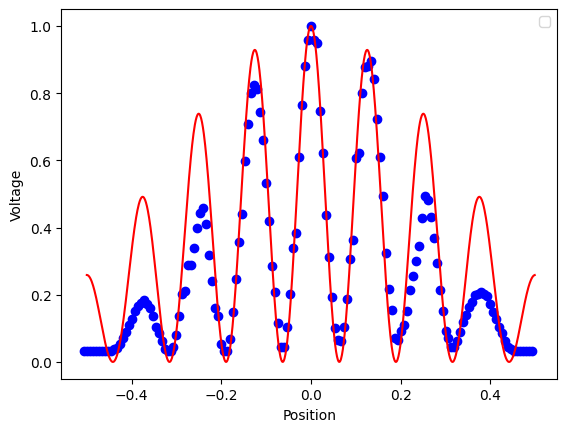

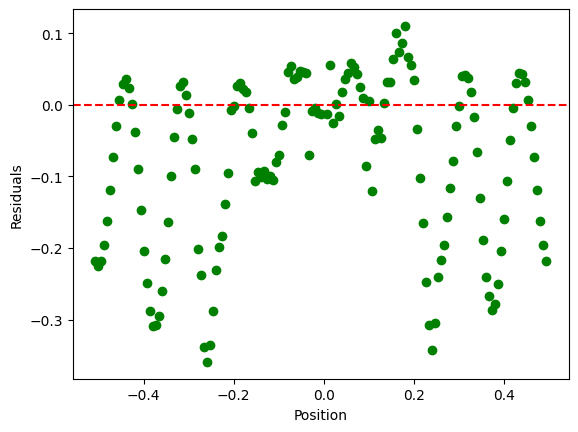

In [348]:
#guess = [1, 0.0113, 0.047, 8.93e-5, 122.66]
#guess = [1, 0.0313, 0.20, 8.93e-5, 90]
guess = [1, 0.030, 0.20, 8.93e-5, 90]

popt, pcov = curve_fit(fit, xArray_Norm, yArray_Norm, guess)

# Generate fit values for plotting
xFit = np.arange(-0.5, 0.5, 0.001)
yFit = fit(xFit, *popt)

# Original scatter plot and fit curve
plt.scatter(xArray_Norm, yArray_Norm, color="blue")
plt.plot(xFit, yFit, color="r")

plt.xlabel("Position")
plt.ylabel("Voltage")

plt.legend()
plt.show()

# Calculate and plot residuals
residuals = yArray_Norm - fit(xArray_Norm, *popt)

plt.figure()  # Create a new figure for the residuals plot
plt.scatter(xArray_Norm, residuals, color="green")
plt.axhline(y=0, color='r', linestyle='--')  # This line is for reference to show where residuals = 0

plt.xlabel("Position")
plt.ylabel("Residuals")

plt.show()

# Laser Single Slit Experiment

/var/folders/d9/g983q81d2fx749b4vhp_0bt00000gn/T/ipykernel_70309/718964168.py:2: RuntimeWarning: invalid value encountered in divide
  return I0 * ((np.sin(a*x/(lam*D)))**2 / (a*x/((lam*D)))**2)


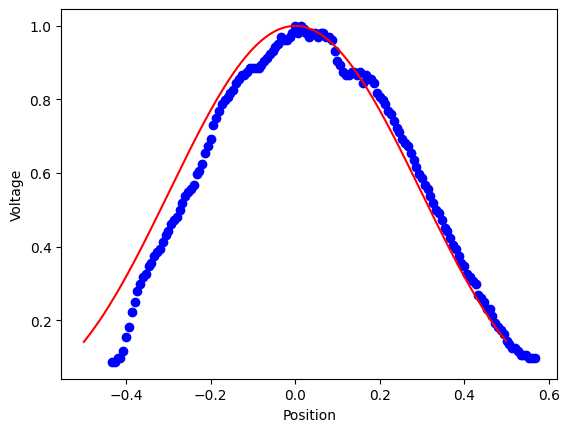

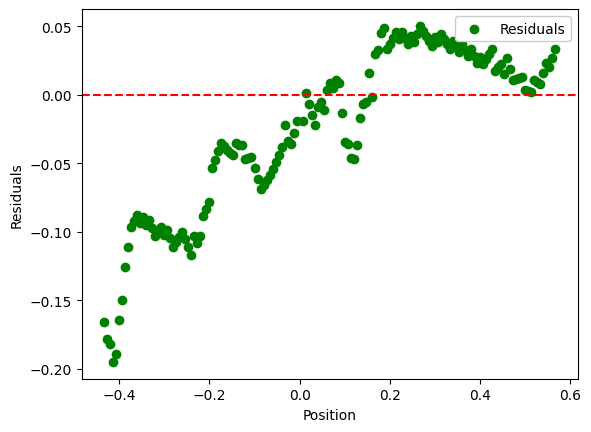

In [349]:
guess = [1, 0.03, 8.93e-5, 77]
# Assuming xArray_Norm1 and yArray_Norm1 are defined elsewhere in your code
popt, pcov = curve_fit(fit1, xArray_Norm1, yArray_Norm1, guess)

# Generate fit values for plotting
xFit1 = np.arange(-0.5, 0.5, 0.001)
yFit1 = fit1(xFit1, *popt)

# Plotting the original scatter and the fit curve
plt.scatter(xArray_Norm1, yArray_Norm1, color="blue")
plt.plot(xFit1, yFit1, color="r")

plt.xlabel("Position")
plt.ylabel("Voltage")

# Customize legend with a solid white background

plt.show()

# Calculate and plot residuals
residuals1 = yArray_Norm1 - fit1(xArray_Norm1, *popt)

plt.figure()  # Create a new figure for the residuals plot
plt.scatter(xArray_Norm1, residuals1, color="green", label="Residuals")
plt.axhline(y=0, color='r', linestyle='--')  # Adds a reference line at zero

plt.xlabel("Position")
plt.ylabel("Residuals")

plt.legend(facecolor='white', framealpha=1)
plt.show()

# Laser Data

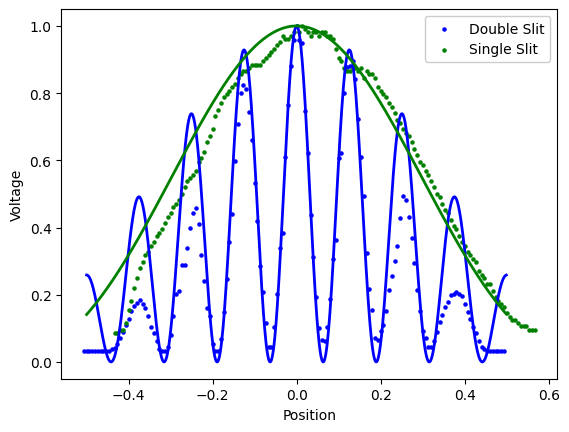

In [350]:
# Plot the first dataset and its fit with smaller dot sizes
plt.scatter(xArray_Norm, yArray_Norm, color="blue", label="Double Slit", s=5)  # s controls the size
plt.plot(xFit, yFit, color="b", linewidth=2)

# Plot the second dataset and its fit with smaller dot sizes
plt.scatter(xArray_Norm1, yArray_Norm1, color="green", label="Single Slit", s=5)  # s controls the size
plt.plot(xFit1, yFit1, color="green",  linewidth=2)

plt.xlabel("Position")
plt.ylabel("Voltage")

# Customize legend to differentiate the datasets and fits
plt.legend(facecolor='white', framealpha=1)

plt.show()

# Bulb Double Slit Experiment

/var/folders/d9/g983q81d2fx749b4vhp_0bt00000gn/T/ipykernel_70309/2336533887.py:2: RuntimeWarning: invalid value encountered in divide
  return I0 * (np.cos(b*x/(lam*D))**2) * ((np.sin(a*x/(lam*D)))**2 / (a*x/((lam*D)))**2)


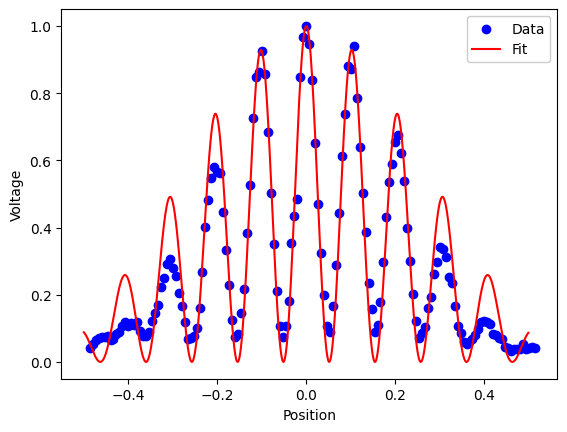

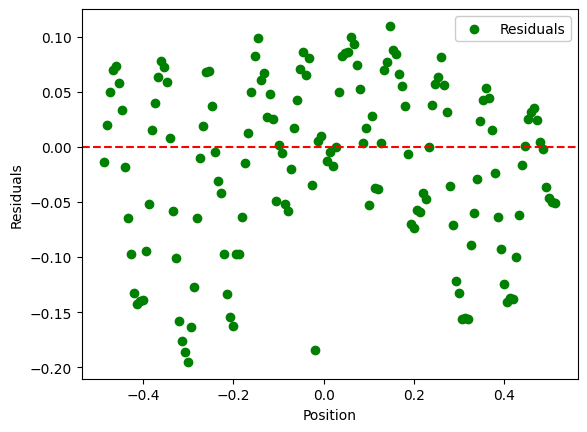

In [351]:
guess = [1, 0.030, 0.20, 8.93e-5*0.815, 90]

popt, pcov = curve_fit(fit, xArray_Norm2, yArray_Norm2, guess)

# Generate fit values for plotting
xFit2 = np.arange(-0.5, 0.5, 0.001)
yFit2 = fit(xFit1, *popt)

# Plotting the original scatter and the fit curve
plt.scatter(xArray_Norm2, yArray_Norm2, color="blue", label="Data")
plt.plot(xFit2, yFit2, color="r", label="Fit")

plt.xlabel("Position")
plt.ylabel("Voltage")

# Customize legend with a solid white background
plt.legend(facecolor='white', framealpha=1)
plt.show()

# Calculate and plot residuals
residuals = yArray_Norm2 - fit(xArray_Norm2, *popt)

plt.figure()  # Create a new figure for the residuals plot
plt.scatter(xArray_Norm2, residuals, color="green", label="Residuals")
plt.axhline(y=0, color='r', linestyle='--')  # Adds a reference line at zero

plt.xlabel("Position")
plt.ylabel("Residuals")

plt.legend(facecolor='white', framealpha=1)
plt.show()

# Bulb Single Slit Experiment

/var/folders/d9/g983q81d2fx749b4vhp_0bt00000gn/T/ipykernel_70309/718964168.py:2: RuntimeWarning: invalid value encountered in divide
  return I0 * ((np.sin(a*x/(lam*D)))**2 / (a*x/((lam*D)))**2)


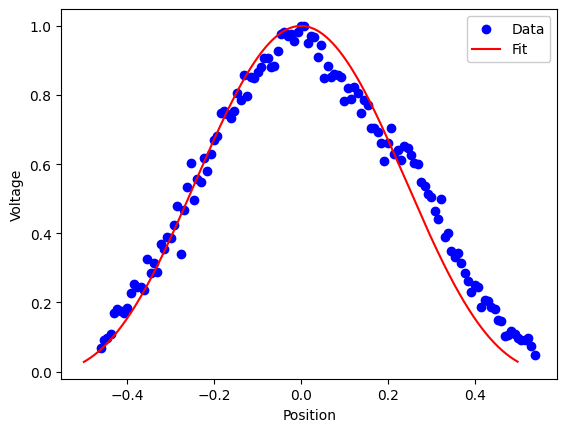

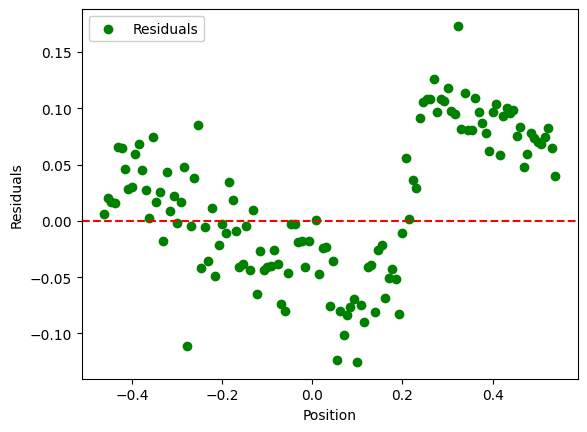

In [352]:
guess = [1, 0.03, 8.93e-5*0.815, 77]

# Curve fitting
popt, pcov = curve_fit(fit1, xArray_Norm3, yArray_Norm3, guess)

# Generate points for the fitted curve
xFit3 = np.arange(-0.5, 0.5, 0.001)
yFit3= fit1(xFit3, *popt)

# Plotting the scatter of the original data and the fit curve
plt.scatter(xArray_Norm3, yArray_Norm3, color="blue", label="Data")
plt.plot(xFit3, yFit3, color="r", label="Fit")

plt.xlabel("Position")
plt.ylabel("Voltage")

# Customize legend with a solid white background
plt.legend(facecolor='white', framealpha=1)
plt.show()

# Calculate and plot residuals
residuals = yArray_Norm3 - fit1(xArray_Norm3, *popt)

plt.figure()  # Create a new figure for the residuals plot
plt.scatter(xArray_Norm3, residuals, color="green", label="Residuals")
plt.axhline(y=0, color='r', linestyle='--')  # This line is for reference to show where residuals = 0

plt.xlabel("Position")
plt.ylabel("Residuals")

# Customize legend with a solid white background for consistency
plt.legend(facecolor='white', framealpha=1)
plt.show()

# Single Slit Data

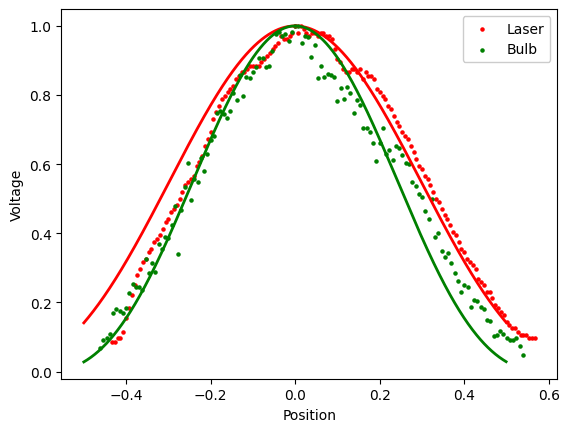

In [353]:
#Laser
plt.scatter(xArray_Norm1, yArray_Norm1, color="red", label="Laser", s=5)  # s controls the size
plt.plot(xFit1, yFit1, color="red", linewidth=2)
#Bulb
plt.scatter(xArray_Norm3, yArray_Norm3, color="g", label="Bulb", s=5)  # s controls the size
plt.plot(xFit3, yFit3, color="g", linewidth=2)

plt.xlabel("Position")
plt.ylabel("Voltage")

# Customize legend to differentiate the datasets and fits
plt.legend(facecolor='white', framealpha=1)

# Double Slit Data

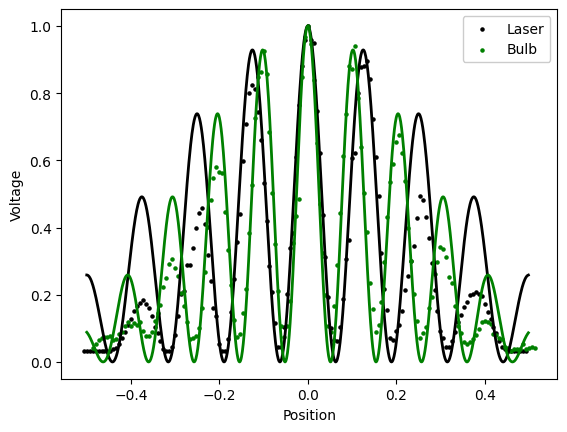

In [354]:
#Laser
plt.scatter(xArray_Norm, yArray_Norm, color="black", label="Laser", s=5)  # s controls the size
plt.plot(xFit, yFit, color="black", linewidth=2)
#Bulb
plt.scatter(xArray_Norm2, yArray_Norm2, color="g", label="Bulb", s=5)  # s controls the size
plt.plot(xFit2, yFit2, color="g", linewidth=2)

plt.xlabel("Position")
plt.ylabel("Voltage")

plt.legend(facecolor='white', framealpha=1)

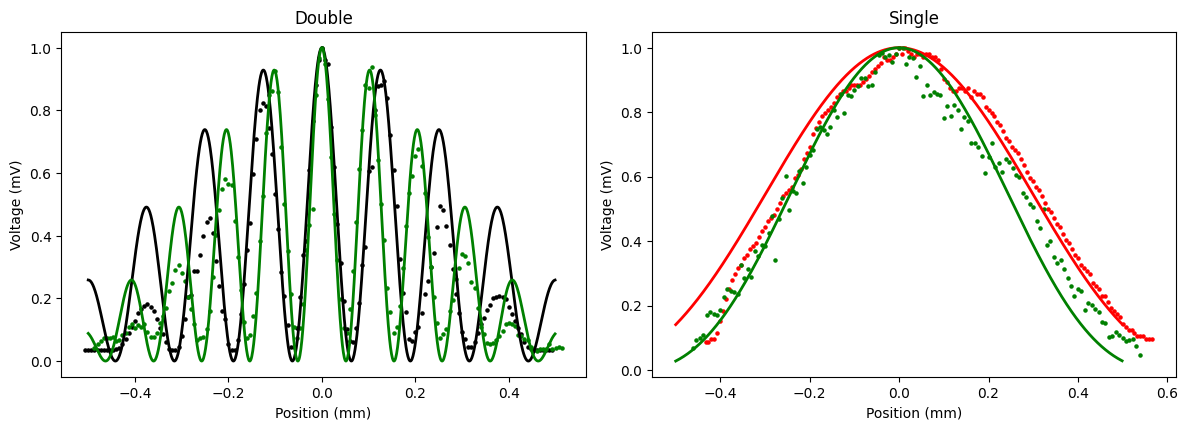

In [355]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
#Laser
plt.scatter(xArray_Norm, yArray_Norm, color="black", label="Laser", s=5)  # s controls the size
plt.plot(xFit, yFit, color="black", linewidth=2)
#Bulb
plt.scatter(xArray_Norm2, yArray_Norm2, color="g", label="Bulb", s=5)  # s controls the size
plt.plot(xFit2, yFit2, color="g", linewidth=2)

plt.xlabel('Position (mm)')
plt.ylabel('Voltage (mV)')
plt.title('Double')

plt.subplot(2, 2, 2)
#Laser
plt.scatter(xArray_Norm1, yArray_Norm1, color="red", label="Laser", s=5)  # s controls the size
plt.plot(xFit1, yFit1, color="red", linewidth=2)
#Bulb
plt.scatter(xArray_Norm3, yArray_Norm3, color="g", label="Bulb", s=5)  # s controls the size
plt.plot(xFit3, yFit3, color="g", linewidth=2)

plt.xlabel('Position (mm)')
plt.ylabel('Voltage (mV)')
plt.title('Single')


plt.tight_layout()
plt.show()

In [389]:
x_error = 0.0013  #mm
#Laser
y_error_single = 0.02  #mV
y_error_double = 0.0067  #mV

#Bulb
y_error_single1 = 0.02  #mV
y_error_double1 = 0.02  #mV

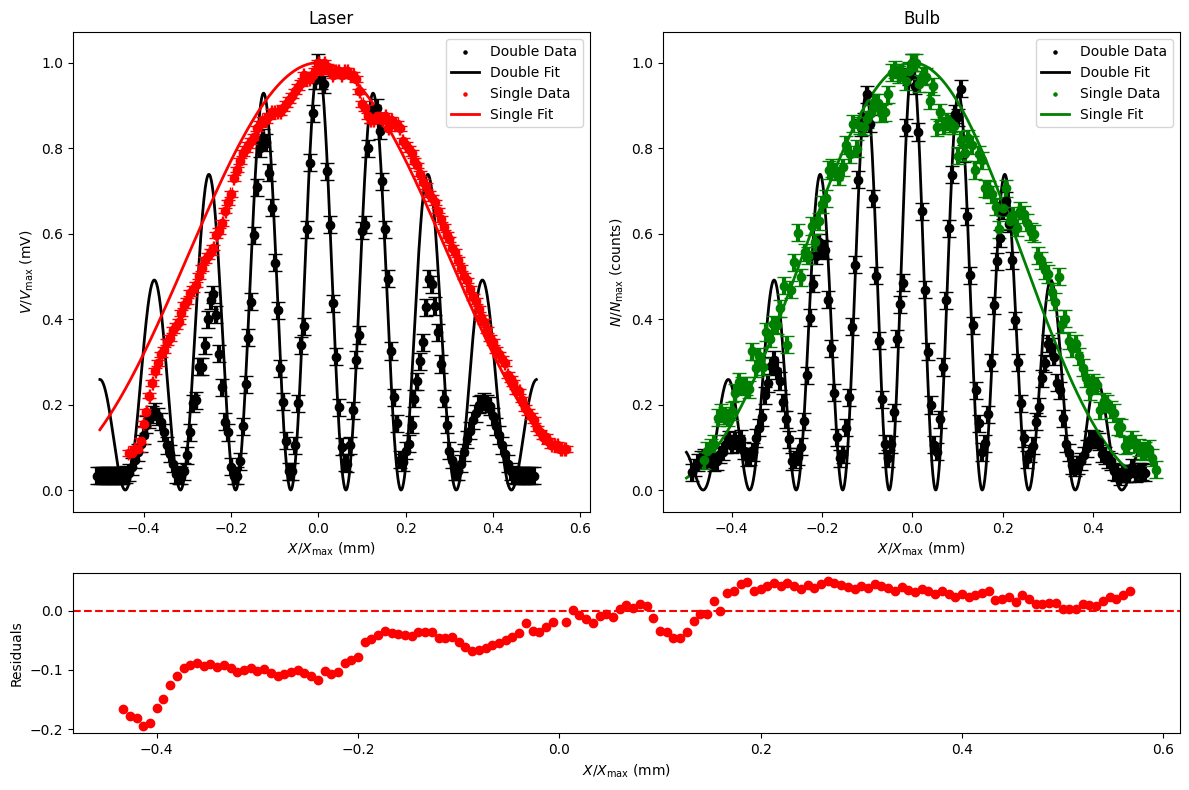

In [410]:

# Define the figure and grid layout
plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(2, 2, height_ratios=[3, 1])  # GridSpec should define the layout for 2 rows and 2 columns

# Use gs to place each subplot in the correct location

# Laser plot in the top-left position
ax0 = plt.subplot(gs[0, 0])
plt.scatter(xArray_Norm, yArray_Norm, label = "Double Data",color="black",  s=5)  # s controls the size
plt.errorbar(xArray_Norm, yArray_Norm, xerr=x_error, yerr=y_error_single, fmt='o', color='black', ecolor='black', elinewidth=3, capsize=5,)
plt.plot(xFit, yFit, color="black", label="Double Fit",linewidth=2)

plt.scatter(xArray_Norm1, yArray_Norm1, label = "Single Data", color="red", s=5)  # s controls the size
plt.errorbar(xArray_Norm1, yArray_Norm1, xerr=x_error, yerr=y_error_double, fmt='o', color='red', ecolor='red', elinewidth=3, capsize=5,)
plt.plot(xFit1, yFit1, color="red", label="Single Fit", linewidth=2)


plt.xlabel(r'$X/X_{\mathrm{max}}$ (mm)')
plt.ylabel(r'$V/V_{\mathrm{max}}$ (mV)')
plt.legend()

plt.title('Laser')

# Bulb plot in the top-right position
ax1 = plt.subplot(gs[0, 1])
#Laser
plt.scatter(xArray_Norm2, yArray_Norm2, label = "Double Data", color="black",  s=5)  # s controls the size
plt.errorbar(xArray_Norm2, yArray_Norm2, xerr=x_error, yerr=y_error_single1, fmt='o', color='black', ecolor='black', elinewidth=3, capsize=5,)
plt.plot(xFit2, yFit2, color="black",  label="Double Fit", linewidth=2)
#Bulb
plt.scatter(xArray_Norm3, yArray_Norm3, label = "Single Data",color="g",  s=5)  # s controls the size
plt.errorbar(xArray_Norm3, yArray_Norm3, xerr=x_error, yerr=y_error_double1, fmt='o', color='g', ecolor='g', elinewidth=3, capsize=5,)
plt.plot(xFit3, yFit3, color="g",  label="Single Fit",linewidth=2)

plt.xlabel(r'$X/X_{\mathrm{max}}$ (mm)')
plt.ylabel(r'$N/N_{\mathrm{max}}$ (counts)')
plt.legend()
plt.title('Bulb')


# Residual plot in the bottom spanned across both columns
ax2 = plt.subplot(gs[1, :])  # Spanning the residual plot across both columns
plt.scatter(xArray_Norm1, residuals1, color="red", label="Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel(r'$X/X_{\mathrm{max}}$ (mm)')
plt.ylabel("Residuals")

# Adjust layout
plt.tight_layout()
plt.show()